In [2]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers

(t_data, t_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [4]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(t_data)
x_test = vectorize_sequences(test_data)



In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asarray(t_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [50]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', 
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

In [51]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [52]:
history = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 2s 138us/step - loss: 0.4964 - acc: 0.7913 - val_loss: 0.3612 - val_acc: 0.8717
Epoch 2/4
15000/15000 [==============================] - 2s 108us/step - loss: 0.2882 - acc: 0.9047 - val_loss: 0.3021 - val_acc: 0.8840
Epoch 3/4
15000/15000 [==============================] - 2s 108us/step - loss: 0.2124 - acc: 0.9312 - val_loss: 0.2897 - val_acc: 0.8850
Epoch 4/4
15000/15000 [==============================] - 2s 107us/step - loss: 0.1668 - acc: 0.9477 - val_loss: 0.2905 - val_acc: 0.8825


In [53]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

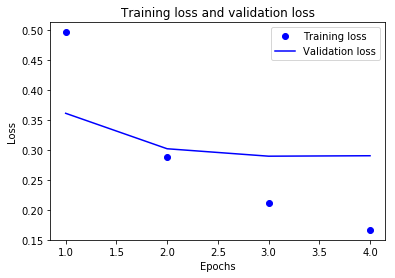

In [54]:
import matplotlib.pyplot as plt

loss_value = history_dict['loss']
val_loo_value = history_dict['val_loss']

epochs = range(1, len(loss_value) +1)

plt.plot(epochs, loss_value, 'bo', label="Training loss")
plt.plot(epochs, val_loo_value, 'b', label="Validation loss")
plt.title('Training loss and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

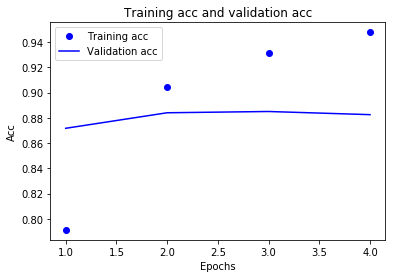

In [55]:
loss_value = history_dict['acc']
val_loo_value = history_dict['val_acc']

epochs = range(1, len(loss_value) +1)

plt.plot(epochs, loss_value, 'bo', label="Training acc")
plt.plot(epochs, val_loo_value, 'b', label="Validation acc")
plt.title('Training acc and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [56]:
model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 129us/step


[0.3161462630558014, 0.87244]

In [57]:
predictions = model.predict(x_test)


In [74]:
predictions[0].shape
predictions


array([[0.14790821],
       [0.997407  ],
       [0.6884037 ],
       ...,
       [0.0827473 ],
       [0.0983253 ],
       [0.5192868 ]], dtype=float32)